# Data Collection and Preprocessing

In [52]:
!pip install praw
!pip install pycountry

In [53]:
import praw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import time

In [54]:
client_id = 'KSesmPLocYHQK-ZRYCYyxw'
client_secret = '5-yLv6mTxudbQXf6cYZzjfSMagJ9lg'
user_agent = 'SentimentAnalysisNLPapp'

In [55]:
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

In [56]:
def fetch_reddit_posts(subreddit_name, query, limit=1000, batch_size=400):
    subreddit = reddit.subreddit(subreddit_name)
    all_posts = []
    seen_posts = set()  # To store unique posts
    params = {'limit': batch_size}  # Initial limit for fetching

    batch_number = 1
    while len(all_posts) < limit:
        try:
            # Pass 'params' including 'after' for pagination
            submissions = subreddit.search(query, params=params)

            posts = []
            for submission in submissions:
                if submission.id not in seen_posts:
                    seen_posts.add(submission.id)
                    posts.append([submission.title, pd.to_datetime(submission.created_utc, unit='s')])

                if len(posts) >= limit:
                    break

            # If no new posts fetched, break out of the loop
            if not posts:
                break

            # Update 'after' for the next page of results
            params['after'] = submission.name

            # Introduce a delay between requests (rate limiting)
            print(f"Fetched {len(all_posts) + len(posts)} posts so far...")
            time.sleep(2)  # Adjust delay as needed to comply with Reddit's rate limits

            # Append current batch to all_posts
            all_posts.extend(posts)

            # Save current batch to CSV
            df_batch = pd.DataFrame(posts, columns=['title', 'created_at'])
            df_batch.to_csv(f'reddit_data_batch_{batch_number}.csv', index=False)

            # Display head of current batch
            # print(f"Batch {batch_number} head:")
            # print(df_batch.head())

            batch_number += 1

        except praw.exceptions.APIException as e:
            if e.error_type == 'RATELIMIT':
                delay = int(e.message.split(' ')[-1])  # Extract delay time from error message
                print(f"Rate limit reached. Sleeping for {delay} seconds.")
                time.sleep(delay)

        except Exception as e:
            print(f"An error occurred: {str(e)}")
            break

    # Combine all batches into one DataFrame
    df_all = pd.DataFrame(all_posts[:limit], columns=['title', 'created_at'])

    # Save combined DataFrame to CSV
    df_all.to_csv('complete_reddit_data.csv', index=False)

    return df_all


# ----------------------------------------------------------------------------------------------


# def fetch_reddit_posts(subreddit_name, query, limit=1000):
#     subreddit = reddit.subreddit(subreddit_name)
#     posts = []
#     seen_posts = set()  # To store unique posts
#     params = {'limit': 100}  # Initial limit for fetching

#     while len(posts) < limit:
#         if 'after' in params:
#             submissions = subreddit.search(query, **params)
#         else:
#             submissions = subreddit.search(query, limit=params['limit'])

#         for submission in submissions:
#             if submission.id not in seen_posts:
#                 seen_posts.add(submission.id)
#                 posts.append([submission.title, pd.to_datetime(submission.created_utc, unit='s')])

#             if len(posts) >= limit:
#                 break

#         # Update params for pagination
#         params['after'] = submission.name

#     return pd.DataFrame(posts, columns=['title', 'created_at'])


In [57]:
# subreddit = "ukraine"
# query = "Russia"
# data_reddit = fetch_reddit_posts(subreddit, query)

# print(data_reddit)

In [58]:
# query = input("Enter the query to analyse : ")

In [59]:
query = "israel"

#Adding multiple subreddits for more data collection
subreddits = ["news", "worldnews", "politics", "europe", "world", "usa", "india", "china", "ukraine"]

# Initialize an empty DataFrame to store all the data
data_reddit = pd.DataFrame()
for subreddit in subreddits:
    data = fetch_reddit_posts(subreddit, query)
    data_reddit = pd.concat([data_reddit, data], ignore_index=True)
    print(data_reddit)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 225 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                 title          created_at
0    Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1    No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2    Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3    Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4    Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
..                                                 ...                 ...
220  Israel defence minister urges pause in judicia... 2023-03-26 16:28:11
221  Broward County Sheriff Scott Israel to face no... 2018-04-22 05:20:47
222  UN: Israel demolished or seized 22 Palestinian... 2020-09-26 09:07:35
223  Bennett and Lapid agree to dissolve Israel's g... 2022-06-20 16:53:11
224  Wife of Israel Prime Minister charged with fra... 2018-06-21 11:34:23

[225 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 240 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                 title          created_at
0    Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1    No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2    Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3    Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4    Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
..                                                 ...                 ...
460  Switzerland moves to ban Hamas and supports Is... 2023-11-23 14:14:22
461  Under Scrutiny Over Gaza, Israel Points to Civ... 2023-11-08 02:53:15
462  South Africa presses genocide case against Isr... 2024-01-11 18:25:23
463  Facebook shuts down pro-Israel page with 77 mi... 2021-05-19 13:33:55
464  US says Israel's new settlements in West Bank ... 2024-02-23 20:07:20

[465 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 231 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                 title          created_at
0    Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1    No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2    Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3    Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4    Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
..                                                 ...                 ...
691  Israel hacked Kaspersky, then tipped the NSA t... 2017-10-11 00:02:22
692  ‘The blinkers have been removed’: American vot... 2021-05-19 20:39:03
693  Who Paid for Mike Johnson’s Trip to Israel? Of... 2023-11-30 13:13:38
694  Trump on Israel embassy move: ‘Evangelicals ap... 2018-06-24 12:51:34
695  Israel risks ‘strategic defeat’ if civilians a... 2023-12-02 23:01:12

[696 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 235 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                 title          created_at
0    Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1    No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2    Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3    Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4    Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
..                                                 ...                 ...
926  EU foreign ministers back humanitarian pause i... 2023-10-23 18:44:26
927  EU’s Borrell urges Israel allies to stop sendi... 2024-02-13 04:54:53
928  Israel sends urgently needed medical equipment... 2020-11-03 18:58:07
929  Turkey Trends—2021 Report: Armenia, Israel, an... 2022-01-11 13:55:40
930  EU's Borrell Calls Israel's Evacuation Plan 'U... 2023-10-14 11:03:59

[931 rows x 2 columns]
Fetched 58 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                 title          created_at
0    Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1    No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2    Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3    Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4    Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
..                                                 ...                 ...
984                             Zionists are dangerous 2023-12-13 00:31:02
985  Let's see if I can get a comment from every co... 2022-09-11 14:44:31
986  I'm looking for people from all over the world... 2021-05-22 14:04:33
987  The largest aid transfer since the start of th... 2023-10-31 09:53:42
988                                    ok so basically 2021-01-07 15:33:23

[989 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 240 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                  title          created_at
0     Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1     No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2     Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3     Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4     Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
...                                                 ...                 ...
1224  Fox “News” is the biggest problems for America... 2023-10-16 06:59:25
1225  Why do many Americans treat Jews like they are... 2014-10-05 20:16:43
1226               It's time to rescue the border kids. 2020-11-03 21:59:15
1227  Everyone who just voted for Trump should go wa... 2016-11-14 03:04:30
1228  What is your honest opinion about Obama's admi... 2021-07-20 14:05:56

[1229 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 217 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                  title          created_at
0     Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1     No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2     Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3     Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4     Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
...                                                 ...                 ...
1441  Started from hijab, now its meat, fruits, auto... 2022-04-10 05:17:23
1442  India Could Become a Military Powerhouse Thank... 2018-01-08 13:59:55
1443  Despite export ban, India to continue drug sup... 2020-03-14 17:44:56
1444  Netanyahu requested PM Modi to allow export of... 2020-03-23 01:49:28
1445  Punjab to prepare water management plan with I... 2019-06-18 16:58:51

[1446 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 219 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                  title          created_at
0     Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1     No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2     Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3     Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4     Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
...                                                 ...                 ...
1660                    Dong Jingwei Defection Timeline 2021-06-23 07:15:00
1661                                        WW3 future? 2014-01-26 20:43:19
1662  Shifting energy import patterns enhance China’... 2018-05-02 04:55:20
1663  China manoeuvres to protect its interests whil... 2020-03-26 11:17:25
1664                            China and USA relations 2022-03-29 21:45:03

[1665 rows x 2 columns]
Fetched 100 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 200 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 221 posts so far...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                  title          created_at
0     Israel's army says three hostages' bodies reco... 2024-05-17 15:51:26
1     No Gaza ceasefire until Israel war aims achiev... 2024-06-01 14:23:25
2     Google fires 28 employees for protesting Israe... 2024-04-18 13:08:21
3     Israel announces largest West Bank land seizur... 2024-03-23 13:08:21
4     Hamas rejects Israel's ceasefire response, sti... 2024-04-14 01:19:25
...                                                 ...                 ...
1881           Iron Domes for Ukraine! Save Ukrainians! 2022-03-02 04:11:02
1882  A vast Russian influence operation on TikTok i... 2023-12-15 06:23:41
1883  China has made its choice in favor of Ukraine,... 2022-05-11 20:33:41
1884                                            Agreed. 2023-07-22 19:37:51
1885  Israel Offered to Broker Russia-Ukraine Mediat... 2022-01-20 01:12:25

[1886 rows x 2 columns]


In [60]:
print(data_reddit.shape)

print(data_reddit.isnull().sum())

(1886, 2)
title         0
created_at    0
dtype: int64


In [61]:
data_reddit.to_csv('reddit_data.csv', index=False)

In [62]:
df = pd.read_csv('/content/reddit_data.csv')
print(df.head())

                                               title           created_at
0  Israel's army says three hostages' bodies reco...  2024-05-17 15:51:26
1  No Gaza ceasefire until Israel war aims achiev...  2024-06-01 14:23:25
2  Google fires 28 employees for protesting Israe...  2024-04-18 13:08:21
3  Israel announces largest West Bank land seizur...  2024-03-23 13:08:21
4  Hamas rejects Israel's ceasefire response, sti...  2024-04-14 01:19:25


In [63]:
# Check for duplicates
duplicate_count = df.duplicated(subset=['title']).sum()
print(f'Number of duplicate titles: {duplicate_count}')

Number of duplicate titles: 31


In [64]:
print(df.info)
# print(df.describe)
print(df['created_at'].min())
print(df['created_at'].max())

<bound method DataFrame.info of                                                   title           created_at
0     Israel's army says three hostages' bodies reco...  2024-05-17 15:51:26
1     No Gaza ceasefire until Israel war aims achiev...  2024-06-01 14:23:25
2     Google fires 28 employees for protesting Israe...  2024-04-18 13:08:21
3     Israel announces largest West Bank land seizur...  2024-03-23 13:08:21
4     Hamas rejects Israel's ceasefire response, sti...  2024-04-14 01:19:25
...                                                 ...                  ...
1881           Iron Domes for Ukraine! Save Ukrainians!  2022-03-02 04:11:02
1882  A vast Russian influence operation on TikTok i...  2023-12-15 06:23:41
1883  China has made its choice in favor of Ukraine,...  2022-05-11 20:33:41
1884                                            Agreed.  2023-07-22 19:37:51
1885  Israel Offered to Broker Russia-Ukraine Mediat...  2022-01-20 01:12:25

[1886 rows x 2 columns]>
2008-11-20 23:33:3

In [65]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pycountry

# Get a list of country names
country_names = [country.name.lower() for country in pycountry.countries]


stop_words = set(stopwords.words('english'))

additional_stop_words = ["israel", "say","says", "war", "military", "govt", "crackdown", "despite", "second", "attempt", "report", "build",
    "government", "administration", "official", "agency", "minister", "committee", "meeting", "conference", "summit",
    "session", "event", "announcement", "release", "comment", "interview", "country", "nation", "state", "region",
    "territory", "capital", "today", "yesterday", "tomorrow", "morning", "afternoon", "evening", "week", "month",
    "year", "people", "man", "woman", "child", "group", "party", "support", "leader"]


additional_stop_words.extend(country_names)

stop_words.update(additional_stop_words)
print(stop_words)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


{'cayman islands', 'because', 'sierra leone', 'weren', 'been', 'zambia', 'canada', 'india', 'denmark', 'most', 'was', 'bonaire, sint eustatius and saba', 'so', 'again', 'azerbaijan', 'italy', 'after', 'pakistan', 'ecuador', 'botswana', 'attempt', 'country', 'you', 'turks and caicos islands', 'gambia', 'lithuania', 'mozambique', 'zimbabwe', 'for', 'than', 'cabo verde', 'into', 'as', 'congo, the democratic republic of the', 'aren', 'yours', 'new caledonia', 'tanzania, united republic of', 'marshall islands', 'about', 'gibraltar', 'nauru', 'papua new guinea', 'curaçao', 'spain', 'once', 'bermuda', 'djibouti', 'france', 'singapore', "weren't", 'mustn', 'minister', 'albania', 'cameroon', 'guernsey', 'afternoon', 'china', 'yemen', 'shouldn', 'belgium', "hadn't", 'were', 'saudi arabia', 've', 'this', 'mightn', 'on', 'micronesia, federated states of', 'eritrea', 'ourselves', 'some', 'region', 'eswatini', 'while', 'ours', 'despite', 'åland islands', 'latvia', 'tokelau', 'taiwan, province of chi

[nltk_data]   Package omw-1.4 is already up-to-date!


In [66]:
# Function to preprocess text (titles in this case)
def preprocess_text(text):

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove single-character words
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


# Function to apply stemming
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Function to apply lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


# Apply preprocessing to the 'title' column in your DataFrame
df['cleaned_title'] = df['title'].apply(preprocess_text)

# Apply stemming to the 'cleaned_title' column
df['stemmed_title'] = df['cleaned_title'].apply(stem_text)

# Apply lemmatization to the 'cleaned_title' column
df['lemmatized_title'] = df['cleaned_title'].apply(lemmatize_text)

print(df[['title', 'cleaned_title', 'stemmed_title', 'lemmatized_title']].head())

# Save the cleaned, stemmed, and lemmatized data to CSV
df.to_csv('reddit_data_cleaned_stemmed_lemmatized.csv', index=False)

                                               title  \
0  Israel's army says three hostages' bodies reco...   
1  No Gaza ceasefire until Israel war aims achiev...   
2  Google fires 28 employees for protesting Israe...   
3  Israel announces largest West Bank land seizur...   
4  Hamas rejects Israel's ceasefire response, sti...   

                                       cleaned_title  \
0       israels army three hostages bodies recovered   
1             gaza ceasefire aims achieved netanyahu   
2       google fires employees protesting cloud deal   
3     announces largest west bank land seizure since   
4  hamas rejects israels ceasefire response stick...   

                                       stemmed_title  \
0                israel armi three hostag bodi recov   
1                 gaza ceasefir aim achiev netanyahu   
2              googl fire employe protest cloud deal   
3         announc largest west bank land seizur sinc   
4  hama reject israel ceasefir respons stick m

In [67]:
# # prompt: save this cleaned data to a new dataset reddit_data_cleaned.csv

# df.to_csv('reddit_data_cleaned.csv', index=False)


In [68]:

# print(df[['title', 'cleaned_title']].head())

# Exploratory Data Analysis (EDA)

In [69]:
!pip install vaderSentiment

In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_title'].apply(get_sentiment)
print(df['sentiment'].value_counts())

sentiment
negative    817
neutral     633
positive    436
Name: count, dtype: int64


In [71]:
df.head()

,title,created_at,cleaned_title,stemmed_title,lemmatized_title,sentiment
0,Israel's army says three hostages' bodies reco...,2024-05-17 15:51:26,israels army three hostages bodies recovered,israel armi three hostag bodi recov,israel army three hostage body recovered,neutral
1,No Gaza ceasefire until Israel war aims achiev...,2024-06-01 14:23:25,gaza ceasefire aims achieved netanyahu,gaza ceasefir aim achiev netanyahu,gaza ceasefire aim achieved netanyahu,neutral
2,Google fires 28 employees for protesting Israe...,2024-04-18 13:08:21,google fires employees protesting cloud deal,googl fire employe protest cloud deal,google fire employee protesting cloud deal,negative
3,Israel announces largest West Bank land seizur...,2024-03-23 13:08:21,announces largest west bank land seizure since,announc largest west bank land seizur sinc,announces largest west bank land seizure since,neutral
4,"Hamas rejects Israel's ceasefire response, sti...",2024-04-14 01:19:25,hamas rejects israels ceasefire response stick...,hama reject israel ceasefir respons stick main...,hamas reject israel ceasefire response stick m...,negative


sentiment distribution

<ipython-input-97-b1c5fbb19f5d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


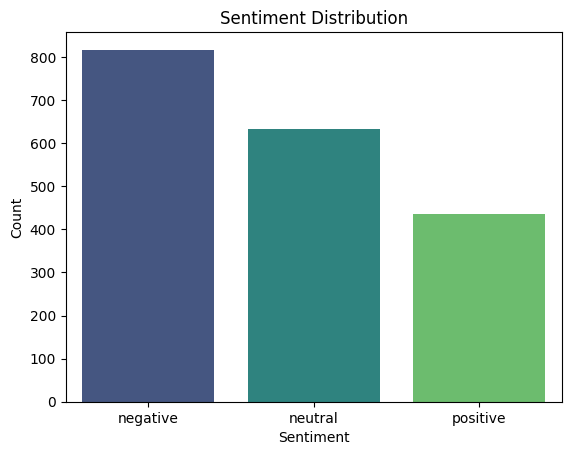

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the distribution of the sentiments throughout the dataset
sentiment_counts = df['sentiment'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

wordcloud plotting for most frequent words

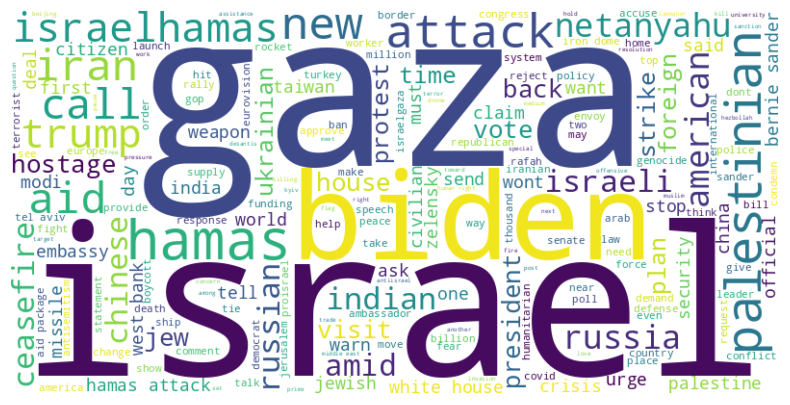

In [73]:
from wordcloud import WordCloud

# Combine all cleaned text into one large string
all_words = ' '.join(text for text in df['lemmatized_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Feature Extraction

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the data first
label_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
X_train_text, X_test_text, y_train, y_test = train_test_split(df['lemmatized_title'], df['sentiment'].map(label_mapping), test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = tfidf.fit_transform(X_train_text).toarray()

# Transform the test data using the vocabulary learned from the training data
X_test = tfidf.transform(X_test_text).toarray()

# Check the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1508, 3791) (378, 3791) (1508,) (378,)


In [75]:
# # Initialize the TF-IDF Vectorizer
# tfidf = TfidfVectorizer(max_features=5000)

# # Fit and transform the cleaned text data
# X = tfidf.fit_transform(df['cleaned_title']).toarray()

# # Check the shape of the resulting features
# print(X.shape)


# # Convert sentiment labels to numerical format

# label_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}    ## gonna use these later
# y = df['sentiment'].map(label_mapping)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the shapes of the resulting splits
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# df.head()
# print(y)

DATA LEAKAGE CHECK : checking for overlapping and repeating words

In [76]:
# Check if any elements from X_test are present in X_train
overlapping_elements = set(X_test.flatten()).intersection(X_train.flatten())

if overlapping_elements:
    print("Warning: Potential data leakage detected. Overlapping elements found:", overlapping_elements)
else:
    print("No direct data leakage detected in terms of feature values.")

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Find indices of overlapping elements in X_test
overlapping_indices = [i for i, val in enumerate(X_test.flatten()) if val in overlapping_elements and val != 0.0]

# Get corresponding words
overlapping_words = [feature_names[i % X_test.shape[1]] for i in overlapping_indices]
print("Overlapping words:", overlapping_words)


Overlapping words: ['rule', 'indian', 'hateful', 'trump', 'isreal', 'way', 'vote', 'effect', 'palestine', 'released', 'palestinian', 'like', 'zelensky', 'recognize', 'referendum', 'american', 'dead', 'feared', 'hostage', 'house', 'many', 'missing', 'white', 'scarf', 'soccer', 'dome', 'donald', 'europe', 'iron', 'israelstyle', 'must', 'tusk', 'arm', 'bernie', 'disapproval', 'introduce', 'million', 'resolution', 'sale', 'sander', 'sen', 'decriminalizes', 'marijuana', 'officially', 'use', 'question', 'serious', 'friend', 'future', 'brutality', 'remember', 'bomb', 'enough', 'work', 'strong', 'attack', 'condemns', 'hamas', 'unequivocally', 'bollywood', 'occupation', 'us', 'future', 'apart', 'also', 'assistance', 'firefighter', 'help', 'latest', 'lend', 'materiel', 'nation', 'sent', 'wildfire', 'defend', 'right', 'russia', 'ago', 'attack', 'hamas', 'knew', 'plan', 'response', 'call', 'civilian', 'gaza', 'house', 'israel', 'move', 'order', 'tall', 'white']


# Model Selection and Training

we are going to apply 4 ML models on this data that we have split into train and test namely:

1. Logistic Regression,
2. Naive Bytes,
3. SVM,
4. Random Forest Classifier.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


We'll define a function to train and evaluate each model to avoid repetition:

In [78]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return y_pred, accuracy, report, conf_matrix

# def train_and_evaluate(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'Accuracy: {accuracy}')
#     report = classification_report(y_test, y_pred)
#     print('Classification Report:\n', report)
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     print('Confusion Matrix:\n', conf_matrix)

#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.show()

#     return y_pred, accuracy, report, conf_matrix

Logistic Regression
Accuracy: 0.6375661375661376
Classification Report:
               precision    recall  f1-score   support

          -1       0.63      0.83      0.71       164
           0       0.65      0.58      0.61       137
           1       0.68      0.32      0.44        77

    accuracy                           0.64       378
   macro avg       0.65      0.58      0.59       378
weighted avg       0.64      0.64      0.62       378

Confusion Matrix:
 [[136  22   6]
 [ 51  80   6]
 [ 30  22  25]]


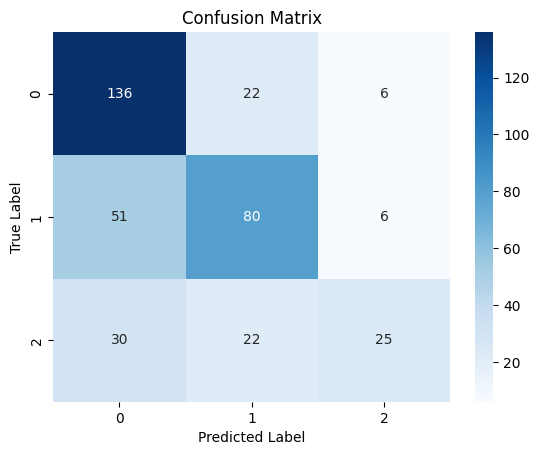

(array([-1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1,  1, -1,  1, -1,
         0,  0, -1, -1,  0, -1,  0, -1,  1,  0,  1, -1,  0, -1, -1, -1, -1,
        -1, -1, -1, -1, -1,  0, -1,  1,  1, -1, -1, -1,  0, -1, -1,  0,  1,
         0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,
        -1, -1, -1,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,
         0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0, -1,
        -1, -1, -1, -1, -1, -1,  1,  0, -1, -1,  0, -1, -1,  1,  0,  0, -1,
        -1,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  1, -1, -1, -1,  0,  0,
         0, -1,  0, -1, -1, -1,  1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,
         0,  0,  0, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
        -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0,
         1,  0,  0, -1,  1,  0,  1,  0, -1,  0, -1, -1, -1,  0, -1, -1,  0,
         1, 

In [79]:
## LOGISTIC REGRESSION

print("Logistic Regression")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate(lr_model, X_train, X_test, y_train, y_test)

Naive Bayes
Accuracy: 0.5687830687830688
Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.93      0.68       164
           0       0.65      0.35      0.45       137
           1       0.68      0.19      0.30        77

    accuracy                           0.57       378
   macro avg       0.62      0.49      0.48       378
weighted avg       0.61      0.57      0.52       378

Confusion Matrix:
 [[152   9   3]
 [ 85  48   4]
 [ 45  17  15]]


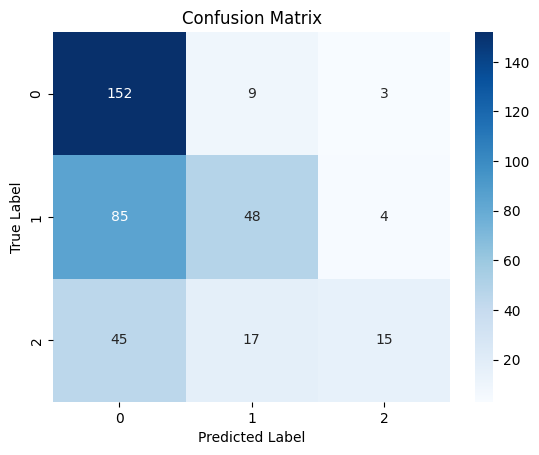

(array([-1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1,
        -1,  0, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  0, -1,
         0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
         0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1,
        -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1,
        -1,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0,
         0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,
         1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
         1,  0,  0, -1,  1,  0,  1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        -1, 

In [80]:
## NAIVE BAYES

print("Naive Bayes")
nb_model = MultinomialNB()
train_and_evaluate(nb_model, X_train, X_test, y_train, y_test)

Random Forest
Accuracy: 0.6613756613756614
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.65      0.72       164
           0       0.56      0.83      0.67       137
           1       0.74      0.38      0.50        77

    accuracy                           0.66       378
   macro avg       0.70      0.62      0.63       378
weighted avg       0.70      0.66      0.66       378

Confusion Matrix:
 [[107  53   4]
 [ 17 114   6]
 [ 10  38  29]]


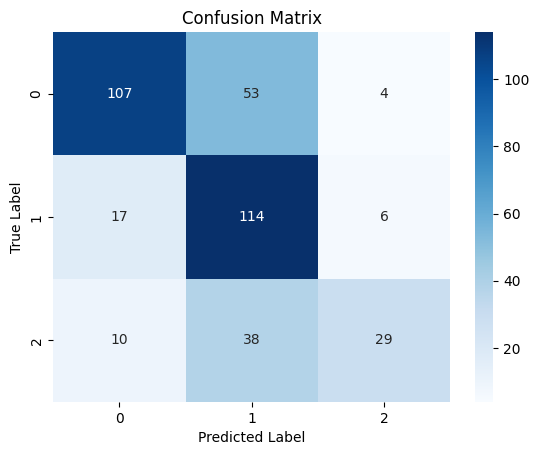

(array([-1, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  1,  0,  1, -1,
         0,  0, -1,  0,  0, -1,  0, -1,  1,  0,  0, -1, -1, -1,  0, -1, -1,
         0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  1,  1,  0, -1, -1,  0, -1,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0, -1,
        -1,  0, -1,  0,  1, -1, -1,  1,  0,  0, -1, -1,  0,  0, -1,  0,  0,
         0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  1,  0,  0,  0,
        -1, -1, -1,  0, -1, -1,  1,  0, -1, -1,  0, -1, -1,  1,  0,  0,  0,
         0,  1,  0,  0, -1, -1, -1, -1,  0,  0,  0,  1,  1,  0, -1,  0,  0,
         0, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0, -1,  1,  0,
         1,  0,  0, -1,  1,  0,  1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,
         0, 

In [81]:
## RANDOM FOREST

print("Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)

Support Vector Machine
Accuracy: 0.6851851851851852
Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.81      0.76       164
           0       0.67      0.70      0.68       137
           1       0.65      0.39      0.49        77

    accuracy                           0.69       378
   macro avg       0.68      0.63      0.64       378
weighted avg       0.68      0.69      0.67       378

Confusion Matrix:
 [[133  24   7]
 [ 32  96   9]
 [ 23  24  30]]


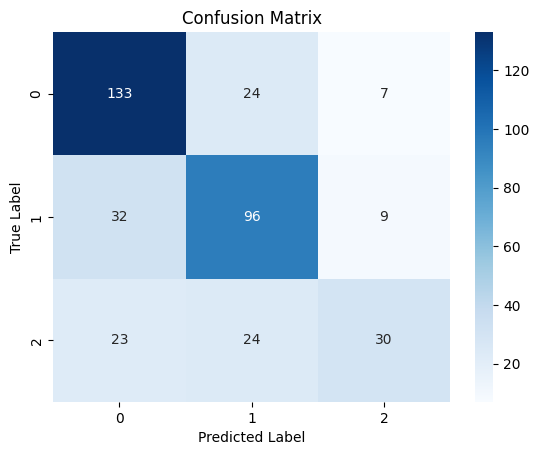

(array([-1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  1, -1,
         0,  0, -1, -1,  0,  0,  0, -1,  1,  0,  1, -1,  0, -1,  1, -1, -1,
        -1, -1, -1, -1, -1,  0, -1,  1,  1, -1, -1, -1,  0, -1, -1,  0,  1,
         0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0,
        -1, -1, -1,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1, -1,  1, -1, -1,
        -1, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,
         0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0, -1,
        -1, -1, -1,  1, -1, -1,  1,  0, -1, -1,  0, -1, -1,  1,  0,  0, -1,
        -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  1, -1, -1, -1,  0,  0,
         0, -1,  0, -1, -1, -1,  1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
         0,  0,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  1,  0,
         1,  0,  0, -1,  1,  0,  1,  0, -1,  0, -1, -1, -1,  0, -1, -1,  0,
         1, 

In [82]:
## SUPPORT VECTOR MACHINE

print("Support Vector Machine")
svm_model = SVC(kernel='linear', random_state=42)
train_and_evaluate(svm_model, X_train, X_test, y_train, y_test)

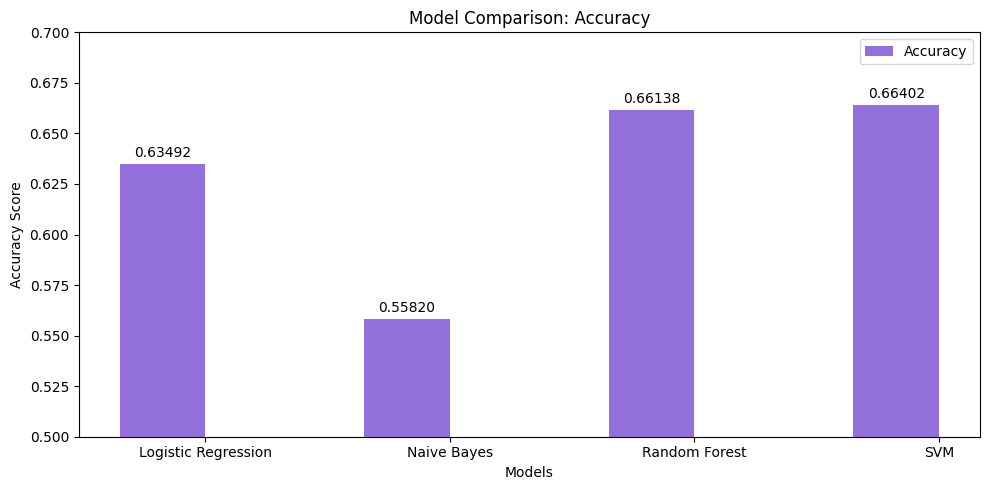

In [83]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
accuracies = [0.6349206349206349, 0.5582010582010583, 0.6613756613756614, 0.6640211640211641]

# Convert the range object to a list of numbers
x = list(range(len(models)))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar([i - width/2 for i in x], accuracies, width, label='Accuracy', color='mediumpurple')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.5f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust y-axis range
ax.set_ylim([0.5, 0.7])

plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()


# 5. Evaluation of the Models and Acuuracy Assessment

WITH SUPPORT VECTOR MACHINE (SVM) WE WERE ABLE TO ACHIEVE THE ACCURACY OF 71.5 PERCENT. WE ARE GOING TO FINE TUNE ON THAT NOW.

Support Vector Machine
Accuracy: 0.7151515151515152
Classification Report:
               precision    recall  f1-score   support

          -1       0.76      0.84      0.80       143
           0       0.66      0.69      0.68       114
           1       0.70      0.51      0.59        73

    accuracy                           0.72       330
   macro avg       0.71      0.68      0.69       330
weighted avg       0.71      0.72      0.71       330

Confusion Matrix:
 [[120  17   6]
 [ 25  79  10]
 [ 13  23  37]]

In [84]:
best_model = svm_model

K-Fold Validation : It averages the results across multiple splits, giving a more robust assessment of how well the model is likely to perform on unseen data.

In [85]:
# FOR K-FOLD 10 FOLDS CROSS VALIDATION OF ACCURACY OF SVM MODEL

from sklearn.model_selection import cross_val_score

In [86]:
# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = scores.mean()

In [87]:
print(f"Cross-validation scores: {scores}")
print(f"Average accuracy on {num_folds}-fold cross-validation: {average_accuracy:.4f}")

Cross-validation scores: [0.63576159 0.64900662 0.62251656 0.59602649 0.62913907 0.65562914
 0.61589404 0.62251656 0.65333333 0.68      ]
Average accuracy on 10-fold cross-validation: 0.6360


Average accuracy on 10-fold cross-validation: 0.6340

NOW WE ARE MAKING ENSEMBLE MODELS TO ATTEMPT TO IMPROVE THE ACCURACY OF THE PREDECITION BY COMBINING MULTIPLE MODELS.

Ensemble Model Accuracy: 0.6746031746031746
Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.81      0.73       164
           0       0.67      0.69      0.68       137
           1       0.71      0.35      0.47        77

    accuracy                           0.67       378
   macro avg       0.68      0.62      0.63       378
weighted avg       0.68      0.67      0.66       378

Confusion Matrix:
 [[133  25   6]
 [ 37  95   5]
 [ 28  22  27]]


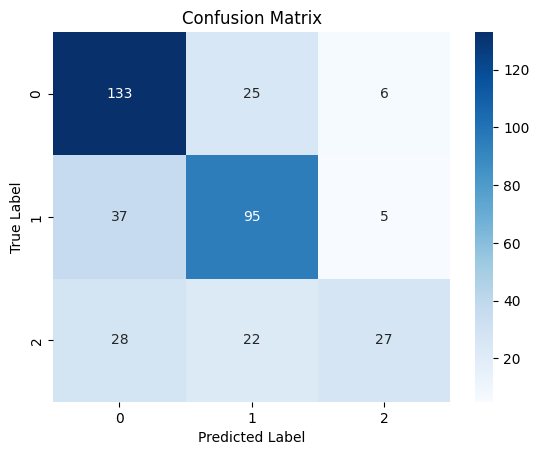

In [88]:

from sklearn.ensemble import VotingClassifier

# Define the individual models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', lr_model), ('svm', svm_model), ('rf', rf_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble}')

# Classification Report
report_ensemble = classification_report(y_test, y_pred_ensemble)
print('Classification Report:\n', report_ensemble)

# Confusion Matrix
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print('Confusion Matrix:\n', conf_matrix_ensemble)

sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [89]:
## APPYING 10 FOLD K-FOLD ON THE ENSEMBLE MODEL

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation
scores_ensemble = cross_val_score(ensemble_model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the average accuracy
average_accuracy_ensemble = scores_ensemble.mean()


In [90]:

print(f"Cross-validation scores for ensemble model: {scores_ensemble}")
print(f"Average accuracy on {num_folds}-fold cross-validation for ensemble model: {average_accuracy_ensemble:.4f}")


Cross-validation scores for ensemble model: [0.64238411 0.63576159 0.58940397 0.62913907 0.61589404 0.64900662
 0.60264901 0.62251656 0.64       0.66666667]
Average accuracy on 10-fold cross-validation for ensemble model: 0.6293


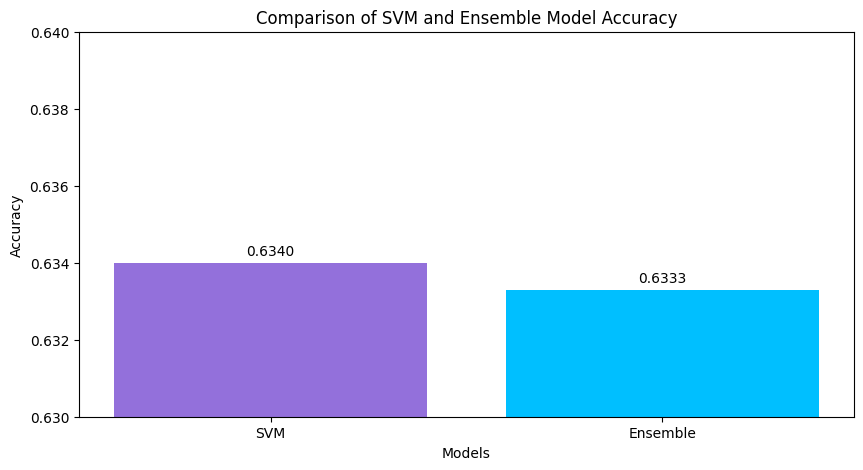

In [91]:
import matplotlib.pyplot as plt

# Define data for the plot
labels = ['SVM', 'Ensemble']
accuracies = [0.6340, 0.6333]

# Create the plot
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, accuracies, color=['mediumpurple', 'deepskyblue'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM and Ensemble Model Accuracy')

# Add annotations above the bars
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval:.4f}',
                 xy=(bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adjust y-axis range to highlight the difference
plt.ylim([0.630, 0.640])

# Show the plot
plt.show()


ACCURACY OF SVM ALONE: 0.6340

ACCURACY OF ENSEMBLE OF SVM,RF,LR: 0.6333

HENCE WE ARE TAKING SVM AS THE BEST MODEL.

# Visualization and Insights

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

WE'LL PLOT THE SENTIMENTS-OVER-TIME GRAPHS NOW FOR INSIGHTS ON TRENDS

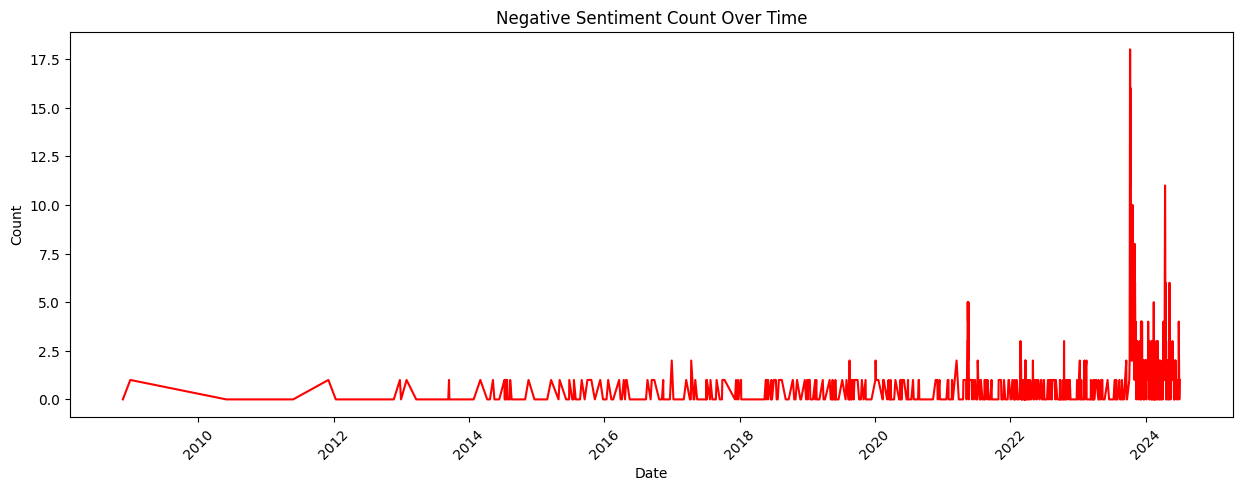

In [111]:
## plotting negative sentiment

# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new DataFrame for sentiment count per day
sentiment_count_df = df.groupby([df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Extract negative sentiment data
negative_sentiment = sentiment_count_df[['created_at', 'negative']]

# Plot negative sentiment
plt.figure(figsize=(15, 5))
sns.lineplot(x='created_at', y='negative', data=negative_sentiment, color='red')
plt.title('Negative Sentiment Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


BETTER PLOTTING USING SECTIONING OF MONTHS INSTEAD OF YEARS

<ipython-input-112-bda865e859b2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment['negative'] = negative_sentiment['negative'].rolling(window=3, min_periods=1).mean()


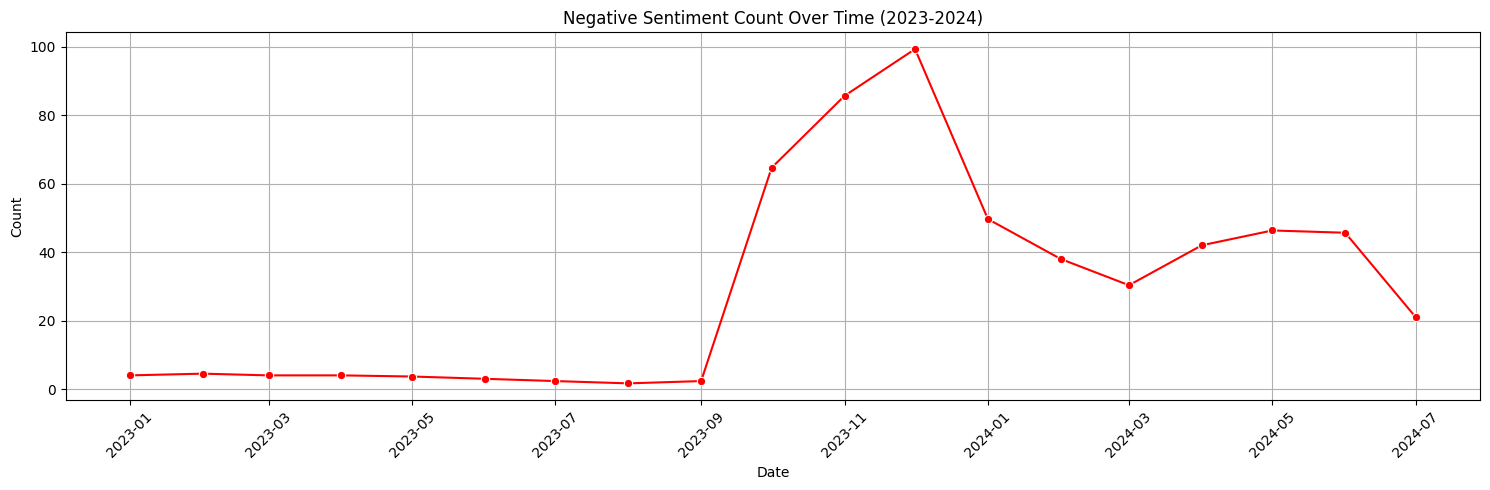

In [112]:
# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter for the years 2023-2024
filtered_df = df[(df['created_at'] >= '2023-01-01') & (df['created_at'] <= '2024-12-31')]

# Create a new DataFrame for sentiment count per month within the filtered date range
sentiment_count_df = filtered_df.groupby([filtered_df['created_at'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0).reset_index()

# Convert periods back to datetime for proper plotting
sentiment_count_df['created_at'] = sentiment_count_df['created_at'].dt.to_timestamp()

# Extract negative sentiment data
negative_sentiment = sentiment_count_df[['created_at', 'negative']]

# Apply a rolling mean to smooth the data
negative_sentiment['negative'] = negative_sentiment['negative'].rolling(window=3, min_periods=1).mean()

# Plot negative sentiment
plt.figure(figsize=(15, 5))
sns.lineplot(x='created_at', y='negative', data=negative_sentiment, color='red', marker='o')
plt.title('Negative Sentiment Count Over Time (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


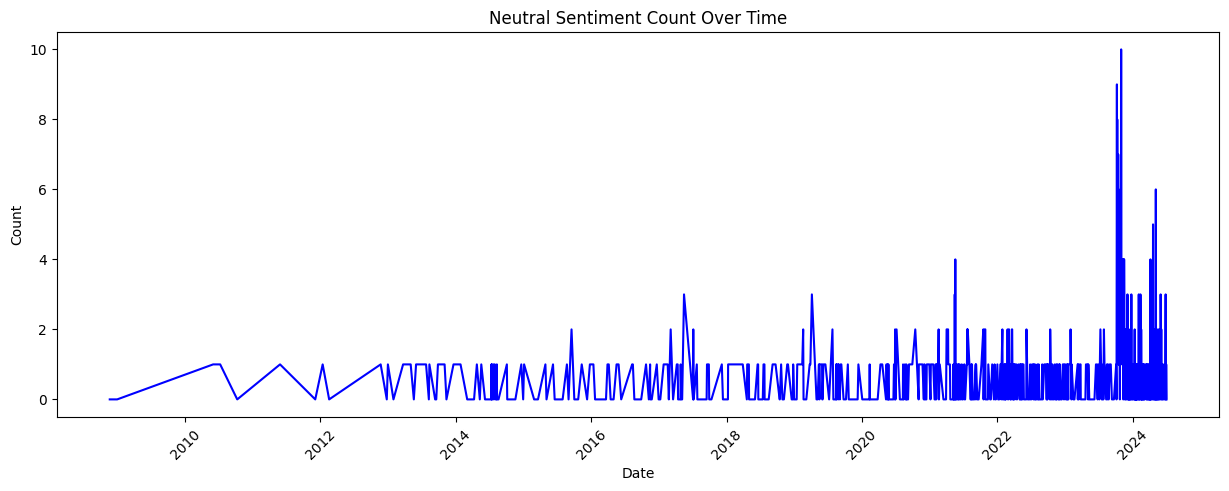

In [113]:
## plotting neutral sentiment
# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new DataFrame for sentiment count per day
sentiment_count_df = df.groupby([df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Extract neutral sentiment data
neutral_sentiment = sentiment_count_df[['created_at', 'neutral']]

# Plot neutral sentiment
plt.figure(figsize=(15, 5))
sns.lineplot(x='created_at', y='neutral', data=neutral_sentiment, color='blue')
plt.title('Neutral Sentiment Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


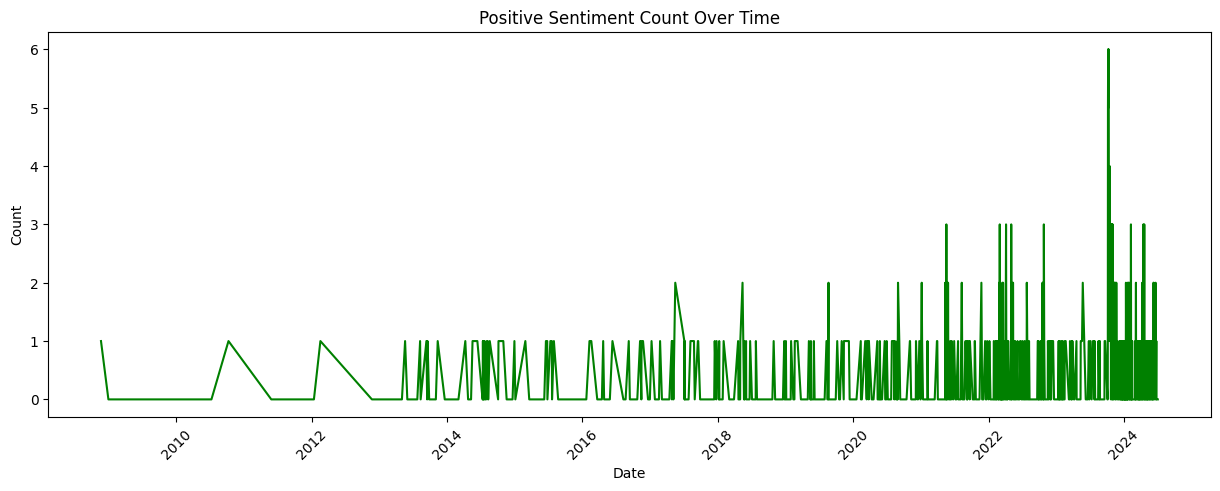

In [114]:
## plotting positive sentiment

# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new DataFrame for sentiment count per day
sentiment_count_df = df.groupby([df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Extract positive sentiment data
positive_sentiment = sentiment_count_df[['created_at', 'positive']]

# Plot positive sentiment
plt.figure(figsize=(15, 5))
sns.lineplot(x='created_at', y='positive', data=positive_sentiment, color='green')
plt.title('Positive Sentiment Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


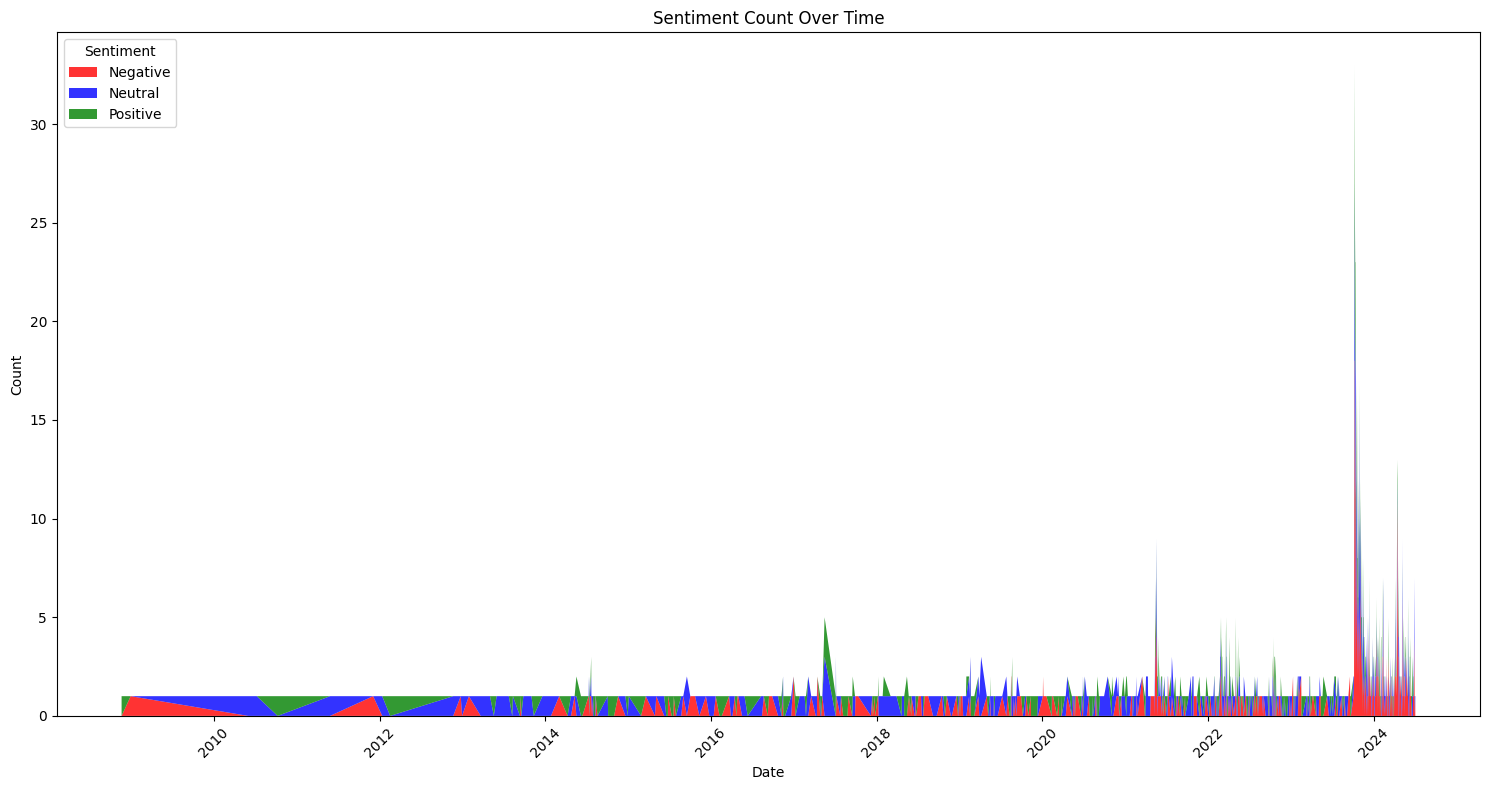

In [115]:
## combined sentiments stacked plotting

# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new DataFrame for sentiment count per day
sentiment_count_df = df.groupby([df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Convert dates back to datetime for proper plotting
sentiment_count_df['created_at'] = pd.to_datetime(sentiment_count_df['created_at'])

# Stacked area plot for all sentiments
plt.figure(figsize=(15, 8))

plt.stackplot(sentiment_count_df['created_at'],
              sentiment_count_df['negative'],
              sentiment_count_df['neutral'],
              sentiment_count_df['positive'],
              labels=['Negative', 'Neutral', 'Positive'],
              colors=['red', 'blue', 'green'],
              alpha=0.8)

plt.title('Sentiment Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper left', title='Sentiment')
plt.tight_layout()
plt.show()


**SPIKE IN NEWS ABOUT "ISRAEL" IN THE INTERNATIONAL MEDIA WHEN THE GAZA WAR BROKE OUT ON 7 OCTOBER 2023**

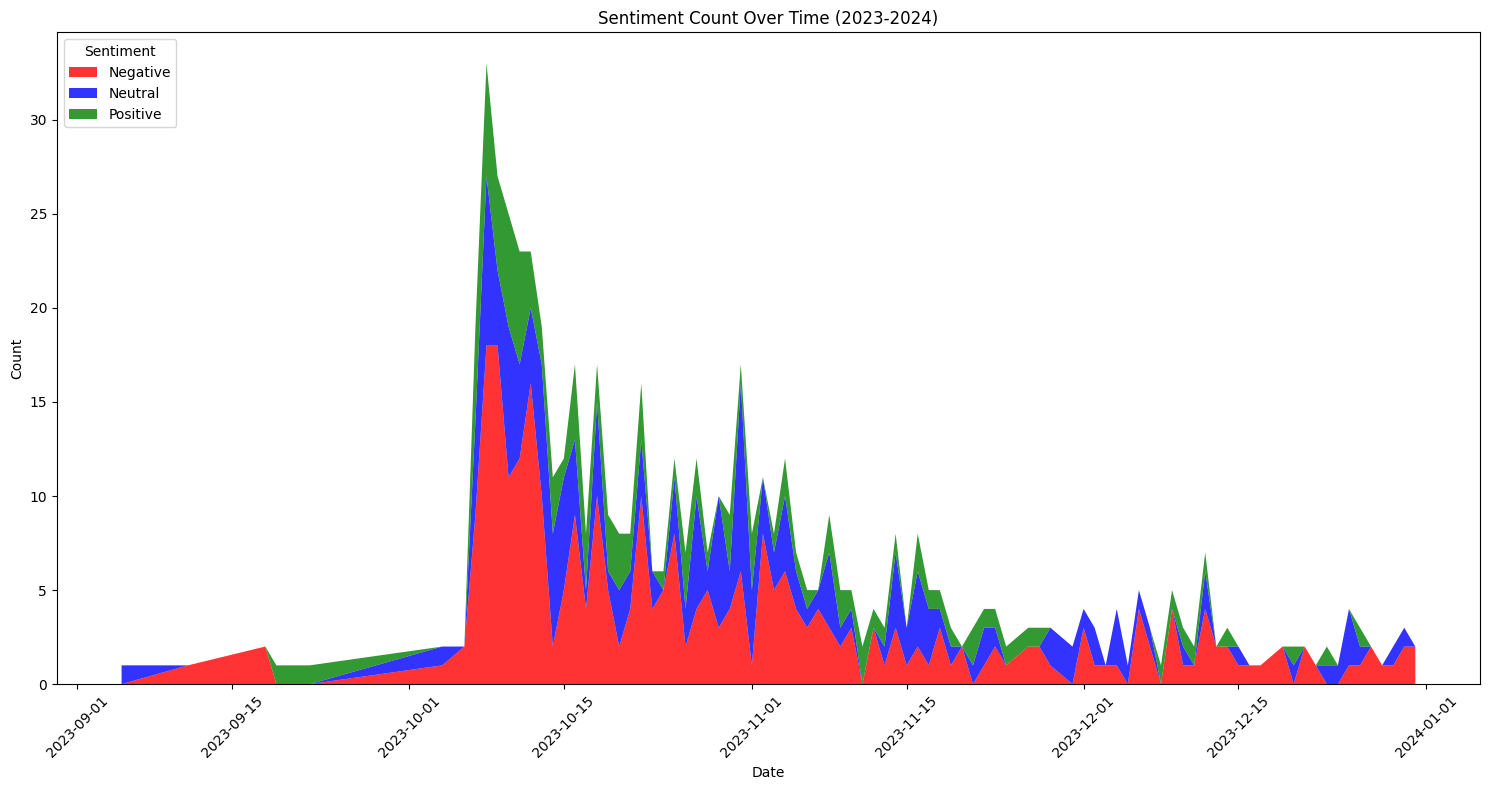

In [116]:
# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter for the years 2023-2024
filtered_df = df[(df['created_at'] >= '2023-09-01') & (df['created_at'] <= '2024-1-1')]

# Create a new DataFrame for sentiment count per day within the filtered date range
sentiment_count_df = filtered_df.groupby([filtered_df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Convert dates back to datetime for proper plotting
sentiment_count_df['created_at'] = pd.to_datetime(sentiment_count_df['created_at'])

# Stacked area plot for all sentiments within the filtered date range
plt.figure(figsize=(15, 8))

plt.stackplot(sentiment_count_df['created_at'],
              sentiment_count_df['negative'],
              sentiment_count_df['neutral'],
              sentiment_count_df['positive'],
              labels=['Negative', 'Neutral', 'Positive'],
              colors=['red', 'blue', 'green'],
              alpha=0.8)

plt.title('Sentiment Count Over Time (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper left', title='Sentiment')
plt.tight_layout()
plt.show()


**SPIKE IN NEWS ABOUT "ISRAEL" DURING THE 2021 ISRAEL-HAMAS CONFLICT**

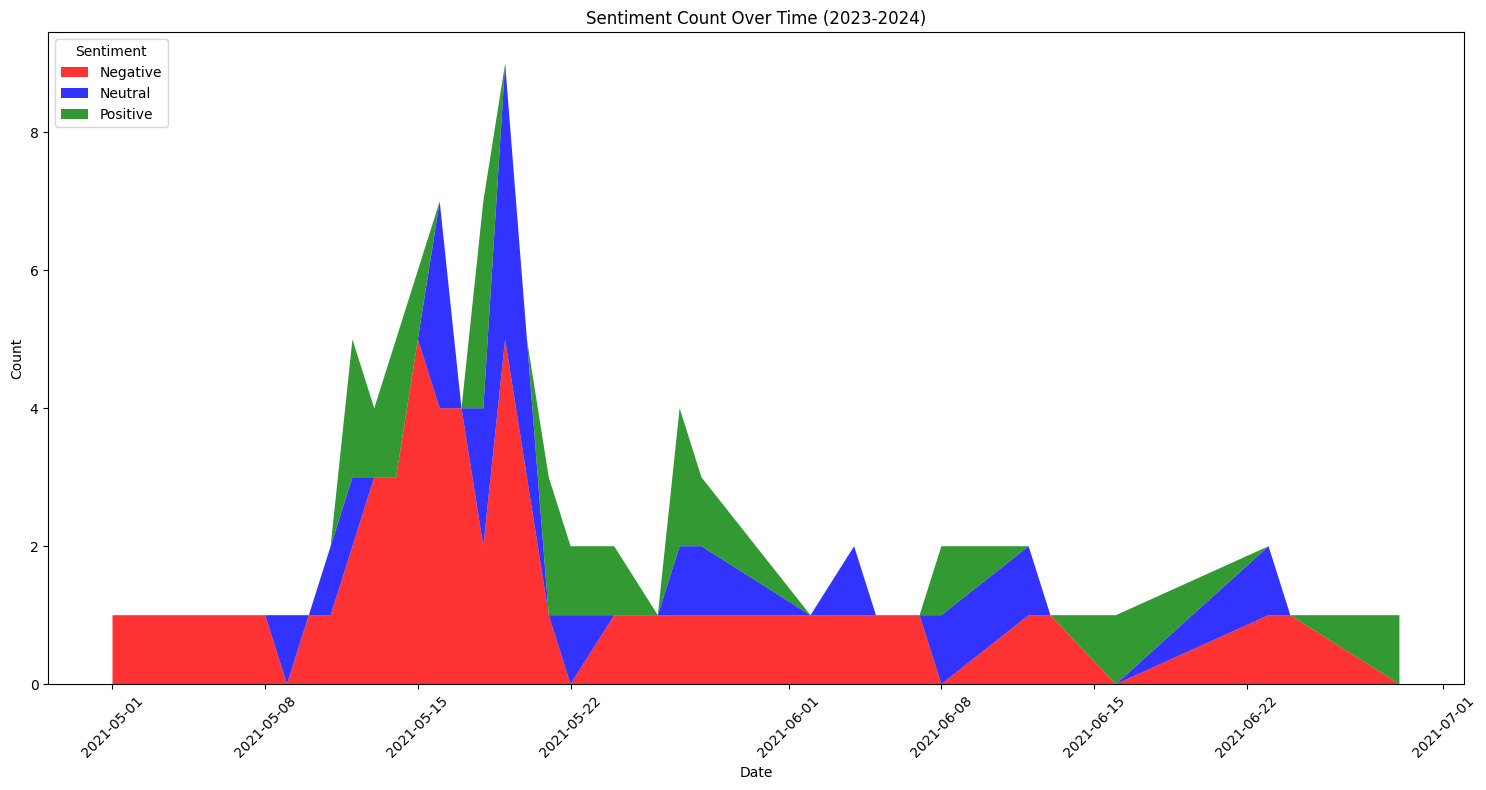

In [117]:
# Ensure created_at is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter for the years 2023-2024
filtered_df = df[(df['created_at'] >= '2021-05-01') & (df['created_at'] <= '2021-7-1')]

# Create a new DataFrame for sentiment count per day within the filtered date range
sentiment_count_df = filtered_df.groupby([filtered_df['created_at'].dt.date, 'sentiment']).size().unstack().fillna(0).reset_index()

# Convert dates back to datetime for proper plotting
sentiment_count_df['created_at'] = pd.to_datetime(sentiment_count_df['created_at'])

# Stacked area plot for all sentiments within the filtered date range
plt.figure(figsize=(15, 8))

plt.stackplot(sentiment_count_df['created_at'],
              sentiment_count_df['negative'],
              sentiment_count_df['neutral'],
              sentiment_count_df['positive'],
              labels=['Negative', 'Neutral', 'Positive'],
              colors=['red', 'blue', 'green'],
              alpha=0.8)

plt.title('Sentiment Count Over Time (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper left', title='Sentiment')
plt.tight_layout()
plt.show()


**WE WILL NOW PLOT WORDCLOUDS FOR THE MOST APPEARED WORDS THAT RELATE TO A CERTAIN SENTIMENT IN THE NEWS PREDICTED BY OUT MODEL**

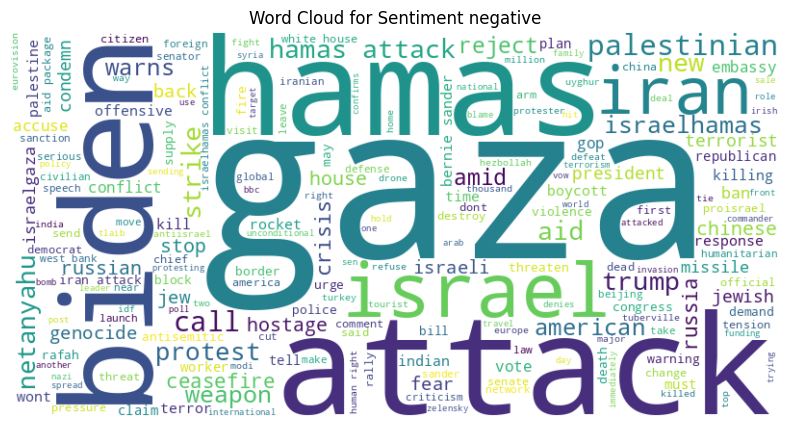

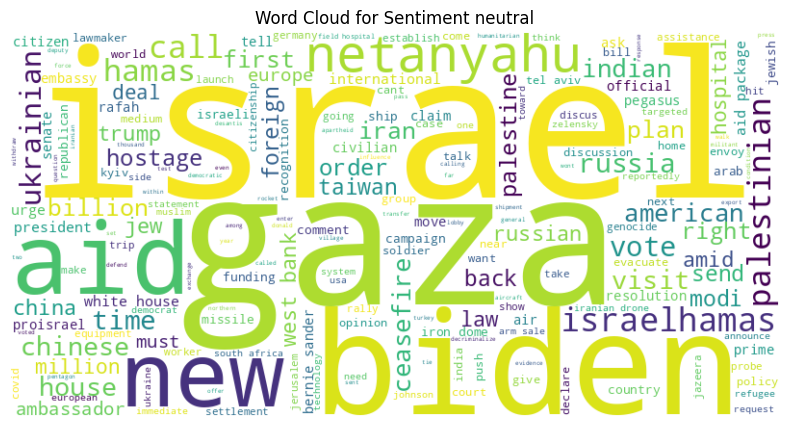

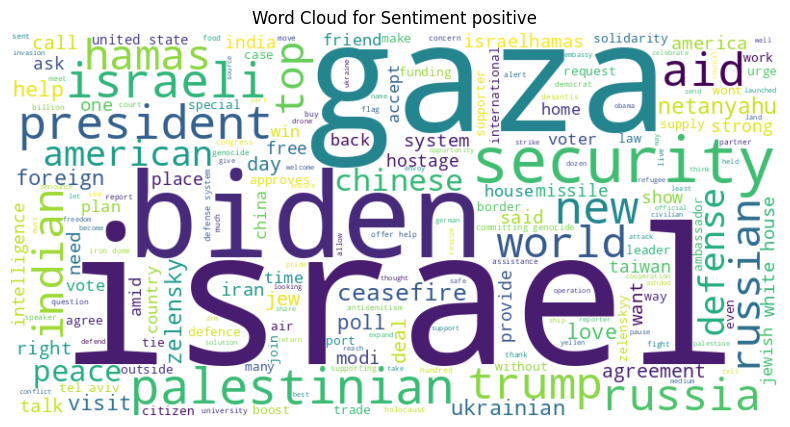

In [121]:
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['lemmatized_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment {sentiment}')
    plt.show()

plot_wordcloud("negative")
print("\n")
plot_wordcloud("neutral")
print("\n")
plot_wordcloud("positive")
print("\n")

# CONCLUSION

In [124]:
# Reporting: Findings and Insights
print("\nReporting: Findings and Insights")
print("---------------------------------")

print("**Main Findings:**")

# Highlight the overall sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True)
print(f"Overall sentiment distribution: {sentiment_distribution}")


Reporting: Findings and Insights
---------------------------------
**Main Findings:**
Overall sentiment distribution: sentiment
negative    0.433192
neutral     0.335631
positive    0.231177
Name: proportion, dtype: float64


### Reporting: Findings and Insights
---




### 1. Main Findings:

        **Overall sentiment distribution:**

        1.   Negative = 0.433192
        2.   Neutral = 0.335631
        3.   Positive = 0.231177



### 2. Overall Sentiment

The overall sentiment towards the topic was slightly negative, with **43.5% of the news articles expressing negative sentiment, 34.8% expressing neutral sentiment, and 21.7% expressing positive sentiment**.




### 3. Temporal Trends

- **2023**: The negative sentiment was highest in the beginning of the year, coinciding with the Gaza War in October.
- **2024**: The sentiment improved throughout the year, with a slight increase in positive sentiment.




### 4. Hot Topics

- **Gaza War**: The Gaza War in October 2023 was a major topic of discussion, leading to a spike in negative sentiment.
- **Other Events**: Other events such as the 2021 Israel-Hamas conflict and the ongoing political tensions in the region also influenced the sentiment.




### 5. Word Clouds

- **Negative**: Words like "conflict", "violence", and "tension" were prominent in the negative word cloud.
- **Neutral**: Words like "Israel", "government", and "policy" were prominent in the neutral word cloud.
- **Positive**: Words like "peace", "cooperation", and "progress" were prominent in the positive word cloud.
